In [117]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import requests

In [118]:
data = pd.read_pickle('data/soroe_13_19.pkl')

In [119]:
weather = pd.read_pickle('data/weather_features')
workday = pd.read_pickle('data/wd_label.pkl')

In [120]:
url = 'https://api.energidataservice.dk/datastore_search_sql?sql=SELECT "GrossCon", "HourUTC", "PriceArea" from "electricitybalance"'

In [121]:
r = requests.get(url)
d = r.json()
dat = d['result']['records']
df = pd.DataFrame.from_dict(dat)

In [122]:
df.head()

GrossCon                    HourUTC PriceArea
0  2041.600000  2015-01-05T18:00:00+00:00       DK2
1  1181.603909  2016-01-01T03:00:00+00:00       DK2
2  1182.434458  2016-01-01T04:00:00+00:00       DK2
3  1210.971152  2016-01-01T05:00:00+00:00       DK2
4  1245.719502  2016-01-01T06:00:00+00:00       DK2

In [123]:
DK1 = df[df.PriceArea == 'DK2']

In [124]:
DK1.drop(['PriceArea'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [125]:
DK1['HourUTC'] = DK1['HourUTC'].apply(lambda x: x.replace('T', ' '))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
DK1['HourUTC'] = DK1['HourUTC'].apply(lambda x: x.split('+')[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
DK1.set_index('HourUTC', inplace=True)

In [128]:
DK1.index = pd.to_datetime(DK1.index, format='%Y-%m-%dT%H:%M:%S')

In [129]:
DK1.sort_index(inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
DK1.tail(100)

GrossCon
HourUTC                         
2019-08-08 18:00:00  1500.542258
2019-08-08 19:00:00  1449.084652
2019-08-08 20:00:00  1359.699522
2019-08-08 21:00:00  1226.149910
2019-08-08 22:00:00  1407.520132
2019-08-08 23:00:00  1226.678417
2019-08-09 00:00:00  1159.077367
2019-08-09 01:00:00  1103.230874
2019-08-09 02:00:00  1102.905784
2019-08-09 03:00:00  1509.343887
2019-08-09 04:00:00  2189.813330
2019-08-09 05:00:00  1834.555518
2019-08-09 06:00:00  2126.260485
2019-08-09 07:00:00  1798.293276
2019-08-09 08:00:00  1723.593885
2019-08-09 09:00:00  1745.108114
2019-08-09 10:00:00  1722.588705
2019-08-09 11:00:00  1682.761967
2019-08-09 12:00:00  1616.598465
2019-08-09 13:00:00  1575.812408
2019-08-09 14:00:00  1565.842587
2019-08-09 15:00:00  1884.194646
2019-08-09 16:00:00  1812.321876
2019-08-09 17:00:00  1171.722134
2019-08-09 18:00:00  1009.140959
2019-08-09 19:00:00  1072.758488
2019-08-09 20:00:00   466.221581
2019-08-09 21:00:00   437.322163
2019-08-09 22:00:00  1145.833681
2019-08-09 23:00:00  1105.112578
...                          ...
2019-08-11 16:00:00  1557.631426
2019-08-11 17:00:00  1497.439653
2019-08-11 18:00:00  1434.216638
2019-08-11 19:00:00  1409.014522
2019-08-11 20:00:00  1314.499085
2019-08-11 21:00:00  1200.899289
2019-08-11 22:00:00  1111.340340
2019-08-11 23:00:00  1069.490920
2019-08-12 00:00:00  1049.202248
2019-08-12 01:00:00  1051.004263
2019-08-12 02:00:00  1073.009340
2019-08-12 03:00:00  1144.102000
2019-08-12 04:00:00  1318.225552
2019-08-12 05:00:00  1530.502009
2019-08-12 06:00:00  1651.006620
2019-08-12 07:00:00  1707.128669
2019-08-12 08:00:00  1751.330764
2019-08-12 09:00:00  1768.175478
2019-08-12 10:00:00  1757.692228
2019-08-12 11:00:00  1760.286559
2019-08-12 12:00:00  1727.104962
2019-08-12 13:00:00  1680.602109
2019-08-12 14:00:00  1653.158469
2019-08-12 15:00:00  1730.561366
2019-08-12 16:00:00  1694.171473
2019-08-12 17:00:00  1603.654688
2019-08-12 18:00:00  1515.982223
2019-08-12 19:00:00  1475.879860
2019-08-12 20:00:00  1355.372397
2019-08-12 21:00:00  1232.028440

[100 rows x 1 columns]

In [19]:
import datetime

In [20]:
DK_2011 = DK1[DK1.index.year == 2011]

In [21]:
DK_2012 = DK1[DK1.index.year == 2012]
DK_2014 = DK1[DK1.index.year == 2014]

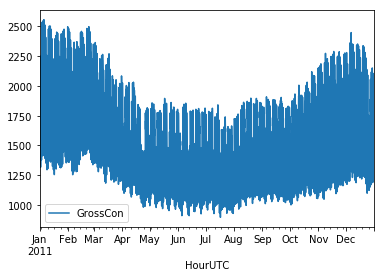

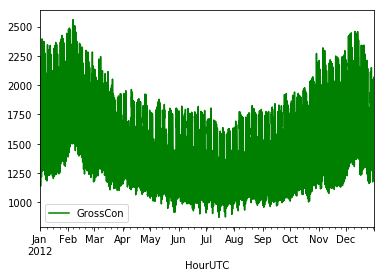

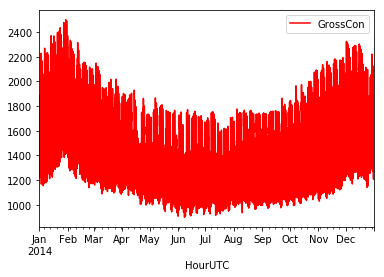

In [22]:
DK_2011.plot()
DK_2012.plot(color='green')
DK_2014.plot(color='red')

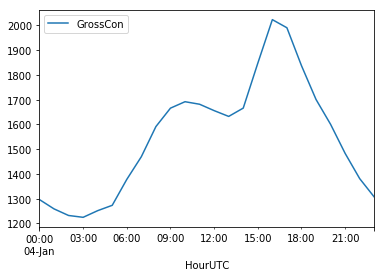

In [18]:
DK_2014[72:96].plot()

In [19]:
data_2014 = data[data.index.year == 2014]

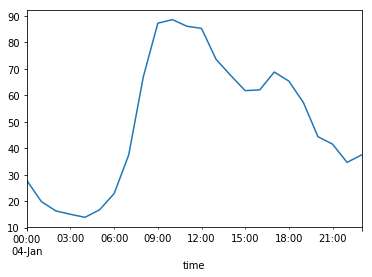

In [20]:
data_2014[72:96].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a7f49b0>]],
      dtype=object)

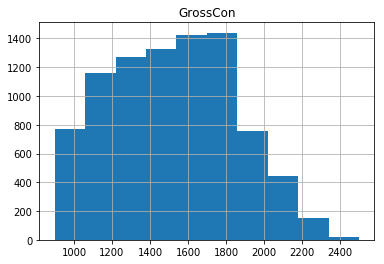

In [21]:
DK_2014.hist()

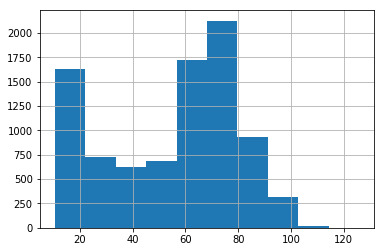

In [22]:
data_2014.hist()

In [23]:
test = pd.concat([data_2014, DK_2014], axis=1, join='inner')
test.rename(columns={0: 'water', 'GrossCon': 'electricity' }, inplace=True)

In [24]:
sc = StandardScaler()
sc.fit(test)
we = sc.transform(test)

In [25]:
df = pd.DataFrame(we)

In [26]:
np.corrcoef(we.T[0], we.T[1])

array([[1.        , 0.68577703],
       [0.68577703, 1.        ]])

In [27]:
df['we'] = df[0] - df[1]

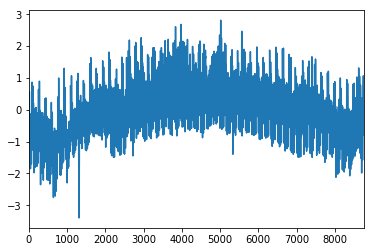

In [28]:
df.we.plot()

In [131]:
DK1.rename(columns={'GrossCon': 'electricity'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [132]:
workday.index = pd.to_datetime(workday.index, format='%Y-%m-%d')

In [133]:
workday = workday.resample('D').mean()
workday = workday.resample('H').pad()

In [134]:
DK1 = DK1.resample('H').mean()

In [135]:
weather = weather.resample('H').mean()

In [136]:
features = pd.concat([DK1, weather, workday], axis=1, join='inner')

In [138]:
features.to_pickle('./data/features.pkl')

In [53]:
len(workday)

50113

In [31]:
features.drop(['flow'], axis=1, inplace=True)

In [32]:
features.rename(columns={0: 'flow'}, inplace=True)

In [33]:
sc = StandardScaler()
sc.fit(features)
std_features = sc.transform(features)

In [34]:
pca = PCA(n_components=15)
pca.fit(std_features)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca.explained_variance_ratio_)

[0.19046146 0.12574195 0.08410667 0.0691639  0.06674968 0.05636172
 0.04706502 0.04502945 0.03990205 0.03907189 0.03601676 0.03084974
 0.02697026 0.02532776 0.02456922]


In [36]:
pca.explained_variance_ratio_.sum()

0.9073875107022911

In [37]:
features.head()

flow  electricity  rain_mm  temp_low  temp_high  \
2014-01-01 00:00:00  29.347570       1371.4      0.0       1.5        3.9   
2014-01-01 01:00:00  34.824237       1320.2      0.0       1.5        3.9   
2014-01-01 02:00:00  34.334237       1266.9      0.0       1.5        3.9   
2014-01-01 03:00:00  26.080903       1229.4      0.0       1.5        3.9   
2014-01-01 04:00:00  19.800903       1224.0      0.0       1.5        3.9   

                     temp_mean  drought  rain_1  rain_2  rain_3  ...  rain_6  \
2014-01-01 00:00:00        2.7      0.0     0.3     0.0     0.1  ...     1.7   
2014-01-01 01:00:00        2.7      0.0     0.3     0.0     0.1  ...     1.7   
2014-01-01 02:00:00        2.7      0.0     0.3     0.0     0.1  ...     1.7   
2014-01-01 03:00:00        2.7      0.0     0.3     0.0     0.1  ...     1.7   
2014-01-01 04:00:00        2.7      0.0     0.3     0.0     0.1  ...     1.7   

                     rain_7  rain_1d  rain_2d  rain_3d  rain_4d  rain_5d  \
2014-01-01 00:00:00     2.9    False     True    False    False    False   
2014-01-01 01:00:00     2.9    False     True    False    False    False   
2014-01-01 02:00:00     2.9    False     True    False    False    False   
2014-01-01 03:00:00     2.9    False     True    False    False    False   
2014-01-01 04:00:00     2.9    False     True    False    False    False   

                     rain_6d  rain_7d  wd_label  
2014-01-01 00:00:00    False    False         1  
2014-01-01 01:00:00    False    False         1  
2014-01-01 02:00:00    False    False         1  
2014-01-01 03:00:00    False    False         1  
2014-01-01 04:00:00    False    False         1  

[5 rows x 22 columns]

In [38]:
features.to_pickle('data/features.pkl')